In [17]:
%matplotlib inline
import time
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rating_file_path = "./python-data-analysis-master/data/ml-1m/ratings.dat"
movie_file_path = "./python-data-analysis-master/data/ml-1m/movies.dat"
user_file_path = "./python-data-analysis-master/data/ml-1m/users.dat"
#dat 파일 불러오기
rating_data =pd.io.parsers.read_csv(rating_file_path,
                                   names = ['user_id', 'movie_id','rating','time'],
                                   delimiter = '::')
movie_data =pd.io.parsers.read_csv(movie_file_path,
                                   names = ['movie_id', 'title','genre'],
                                   delimiter = '::')
user_data =pd.io.parsers.read_csv(user_file_path,
                                   names = ['user_id', 'gender','age','occupation','zipcode'],
                                   delimiter = '::')



c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you ca

In [18]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [19]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### 분석: 탐색적 데이터 분석하기

In [21]:
#총 영화의 개수를 출력합니다 
print('total of movie in data :', len(movie_data['movie_id'].unique()))

#연도별 영화 개수가 많은 TOp
movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data['year'].value_counts().head()

total of movie in data : 3883


1996    345
1995    342
1998    337
1997    315
1999    283
Name: year, dtype: int64

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

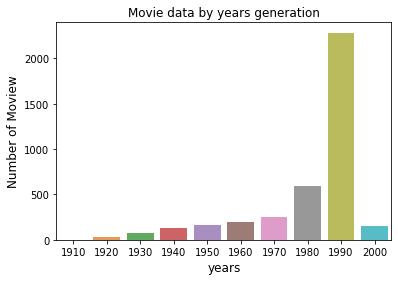

In [22]:
#민퀴즈 영화데이터에 대한 탐색적 데이터 분석을 더 실행, 위의 내용을 응용하여 영화의 연대별 개수를 탐색해보세요
movie_data['year_term'] = movie_data['title'].apply(lambda x: x[-5:-2]+'0') #연도별로 바꾸어준다 
moview_year_term = movie_data['year_term'].value_counts().sort_index() #연도별로 정렬

sns.barplot(moview_year_term.index, moview_year_term.values, alpha = 0.8) #numpy로 index 와 value
plt.title("Movie data by years generation")
plt.ylabel("Number of Moview", fontsize =12)
plt.xlabel('years', fontsize =12)
plt.show

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


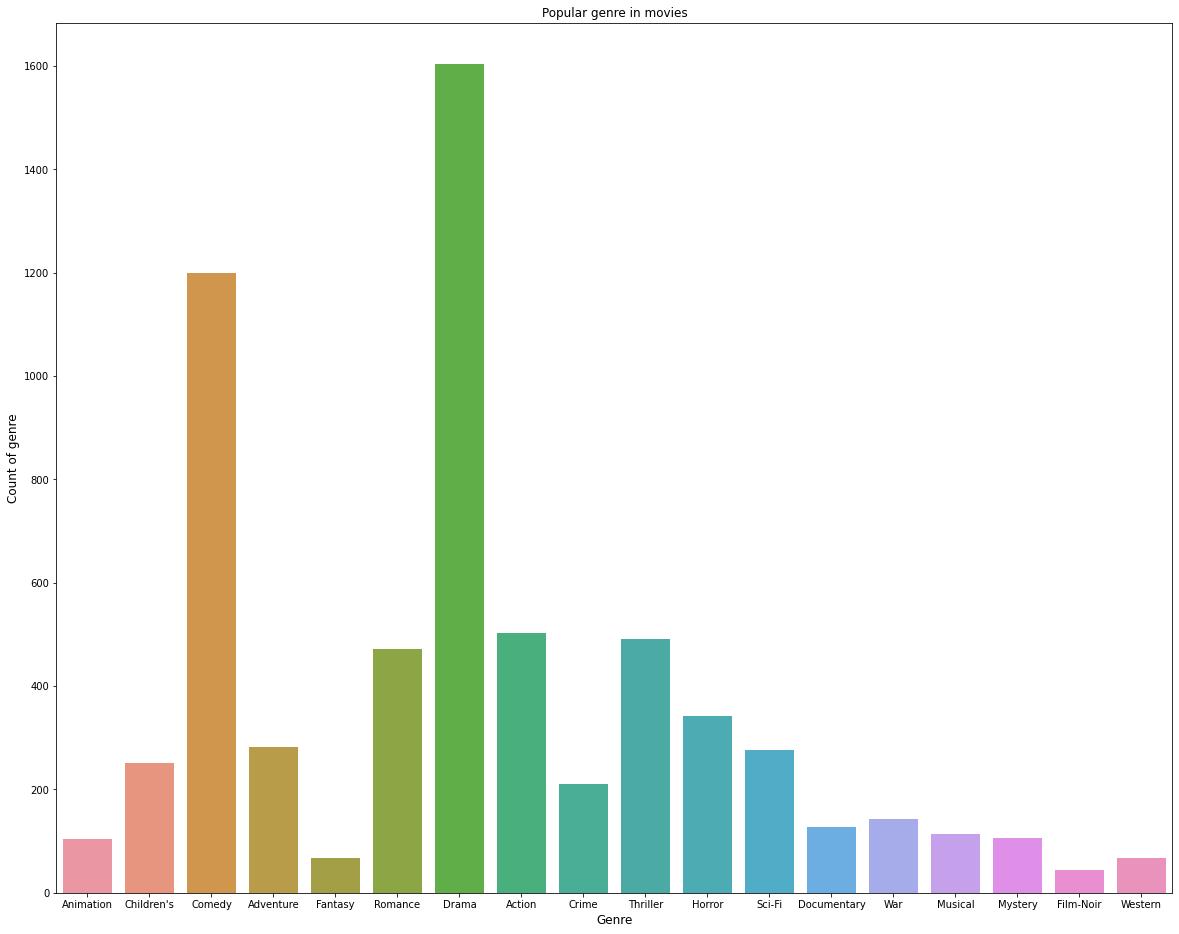

In [23]:
#장르의 속성 탐색하기 
#가장 많이 등장한 장르의 속성을 추출 (Drama)
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    
    #genre 피처를 '|' 구분자로 분리합니다
    genre_combination = row['genre']
    parsed_genre = genre_combination.split('|')
    #구분자로 분리한 장르의 속성을 unique_genre_dict에 각각 계산하여 저장합니다 
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] +=1
        else:
            unique_genre_dict[genre] = 1

#unique_genre_dict를 이용하여 장르의 속성을 그래프로 출력한다 
plt.rcParams['figure.figsize'] = [20,16]
sns.barplot(list(unique_genre_dict.keys()),list(unique_genre_dict.values())) #pandas 로 index와 values

plt.title("Popular genre in movies")
plt.ylabel('Count of genre', fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.show()
            
    

In [24]:
#분석할 유저의 정보 탐색하기
#유저의 수를 탐색
print('total number of user in data', len(user_data['user_id'].unique()))

total number of user in data 6040


In [25]:
#유저 데이터 유저의 성별 탐색
user_data['gender'].value_counts()

#유저의 연령대 탐색
user_data['age'].min()
user_data['age'].max()
def user_range(x):
    if user_data['age'].min() <= x < 10:
        return 0
    elif 10 <= x <20:
        return 10
    elif 20 <= x <30:
        return 20
    elif 30 <= x < 40:
        return 30
    elif 40 <= x <50:
        return 40
    else:
        return 50

    
user_data['age_range'] = user_data['age'].apply(lambda x : user_range(x))

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


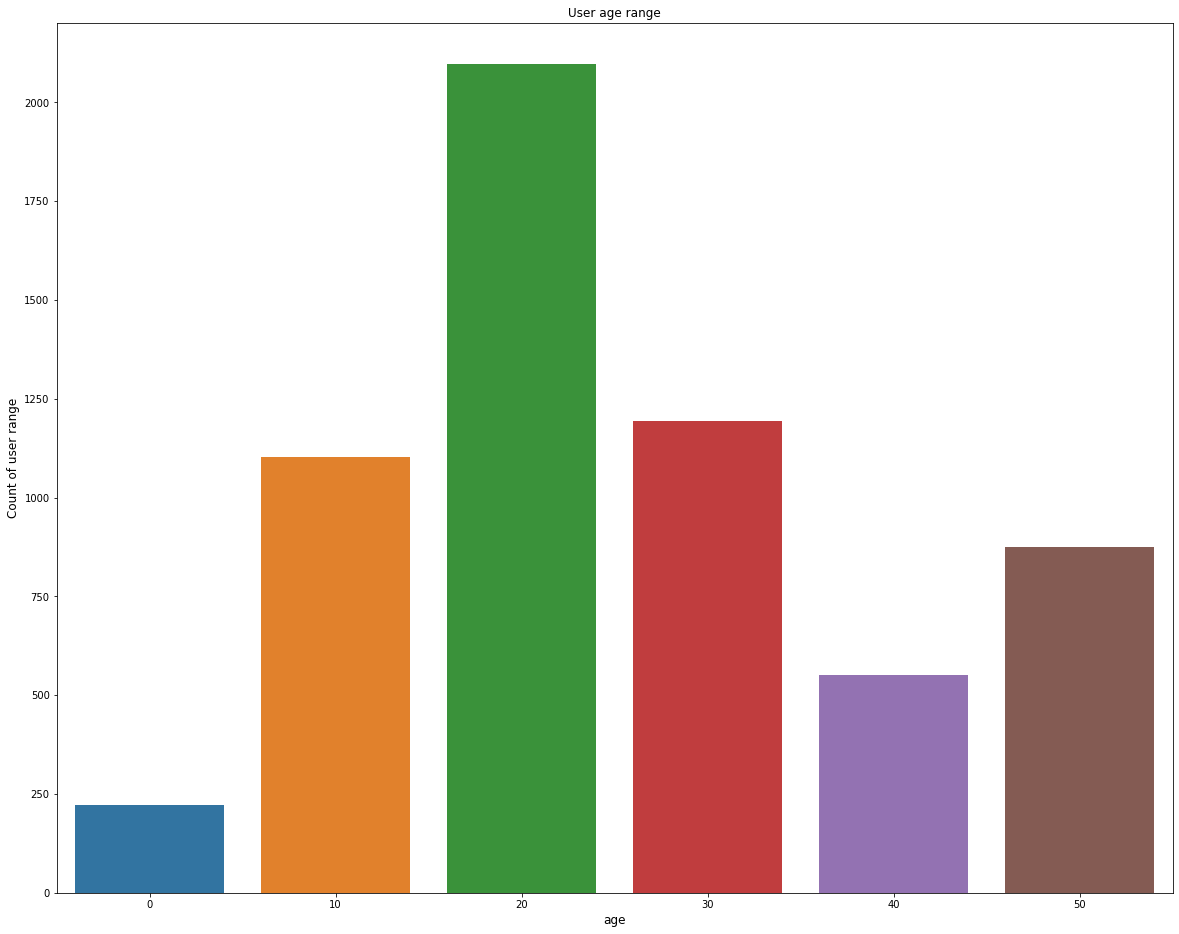

In [26]:
#
user_data_age_range=user_data['age_range'].value_counts().sort_index()


plt.rcParams['figure.figsize'] = [20,16]
sns.barplot(list(user_data_age_range.index),list(user_data_age_range.values))

plt.title("User age range")
plt.ylabel('Count of user range', fontsize = 12)
plt.xlabel('age', fontsize = 12)
plt.show()

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


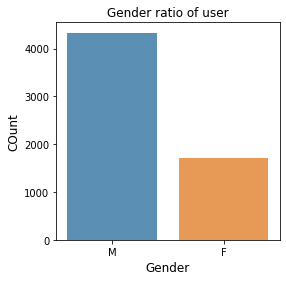

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


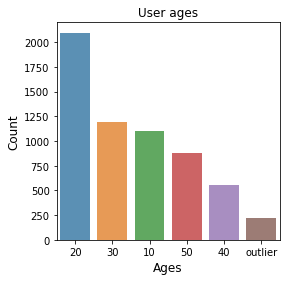

In [27]:
#유저 데이터 유저의 성별 탐색
plt.rcParams['figure.figsize'] = [4,4]
user_gender =user_data['gender'].value_counts()
sns.barplot(user_gender.index, user_gender.values, alpha = 0.8)
plt.title("Gender ratio of user")
plt.ylabel('COunt', fontsize = 12)
plt.xlabel("Gender", fontsize = 12)
plt.show()




#유저의 연령대 탐색
#이상치 제거 1이 이상하다 
def age_classification(age):
    if age ==1:
        return 'outlier'
    else:
        return str(age)[0]+"0"
user_data['ages' ] = user_data['age'].apply(lambda x : age_classification(x))
user_ages = user_data['ages'].value_counts()

sns.barplot(user_ages.index, user_ages.values, alpha = 0.8)
plt.title("User ages")
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Ages', fontsize = 12)
plt.show()

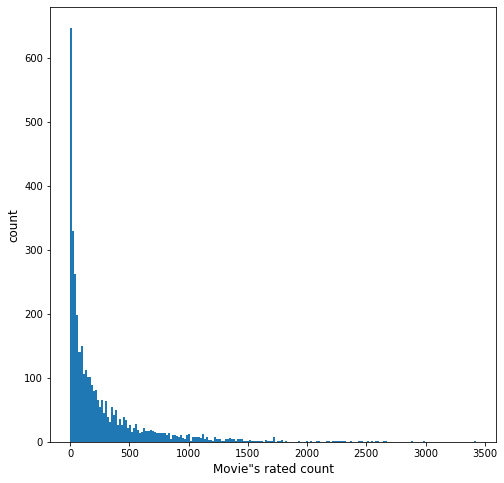

totla number of movie in data 3883
total number of movie rated below 100 1687


In [28]:
#각 영화가 평가받은 횟수를 탐색
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.hist(movie_rate_count, bins =200)
plt.ylabel('count', fontsize =12)
plt.xlabel('Movie"s rated count', fontsize = 12)
plt.show()

print("totla number of movie in data", len(movie_data['movie_id'].unique())) #영화 종류 
print("total number of movie rated below 100", len(movie_rate_count[movie_rate_count <100])) # 100개 이하 



<AxesSubplot:>

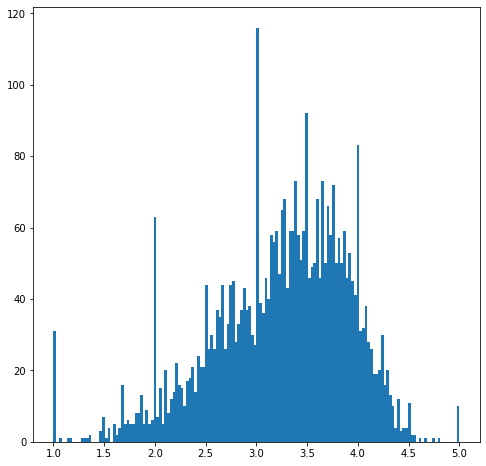

In [29]:
#영화의 평균평점
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean'])
movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid =False)

In [30]:
movie_grouped_rating_info

,rated_count,rating_mean
movie_id,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


<AxesSubplot:>

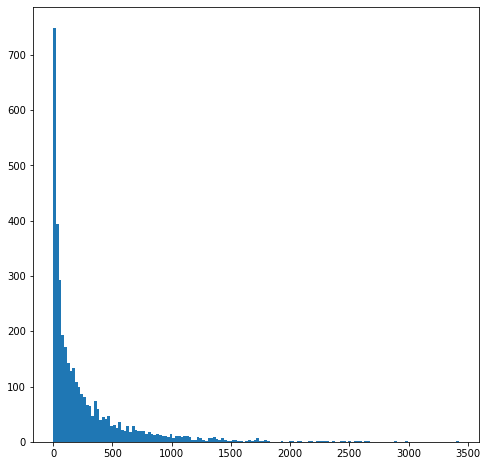

In [31]:
movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean','std'])
movie_grouped_rating_info.columns = ['rated_count','rating_mean','rated_std']
#유저별로 평가한 영화 개수 
movie_grouped_rating_info['rated_count'].hist(bins=150, grid =False)

<AxesSubplot:>

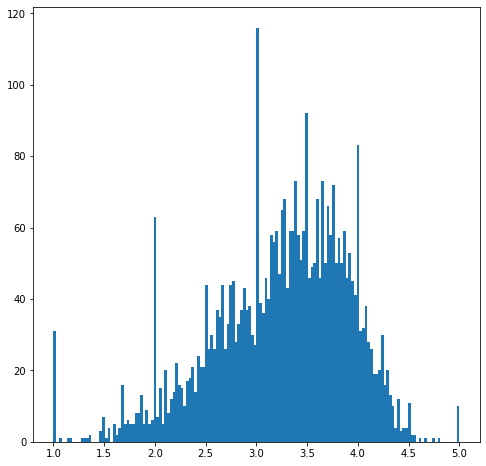

In [32]:
#유저별로 평가한 평균영화 점수
movie_grouped_rating_info['rating_mean'].hist(bins=150, grid =False)

<AxesSubplot:>

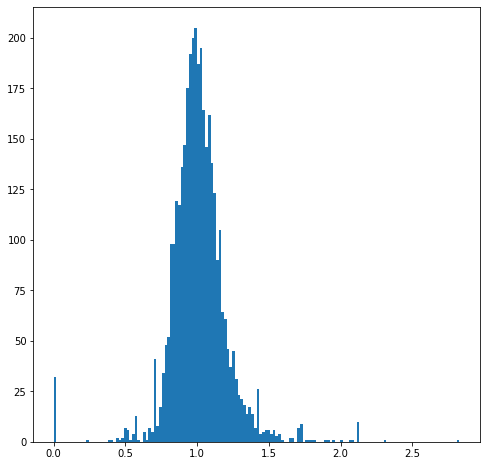

In [33]:
#유저별 점수의 편차
movie_grouped_rating_info['rated_std'].hist(bins=150, grid =False)

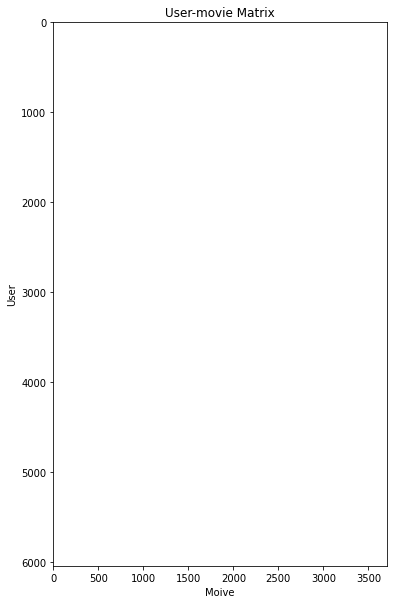

In [34]:
#영화 평점 예측을 수행

#unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성
rating_table = rating_data[['user_id', 'movie_id','rating']].set_index(['user_id','movie_id']).unstack()

#user-movie 표를 시작
plt.rcParams['figure.figsize'] =[10,10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel('Moive')
plt.ylabel('User')
plt.title('User-movie Matrix')
plt.show()
#공간에 색이없는 행렬(희소행렬)이라는 것을 알수 있다 


In [35]:
rating_table.shape

(6040, 3706)

### 수학적 기법을 활용해 평점 예측하기 
- 행렬분해 
SVD : m x n 의 행렬 A U , S, V로 나누는 것 

- 행렬 완성 과정
1. 3개로 나눠진 행렬 U, S, V의 값을 임의 숫자로 초기화 한다 '?'로 표현한 부분
2. 임의의값으로 채워진 3개 행렬을 곱하여 새로운 행렬 A를 계산
3. 새롭게 만들어진 행렬 A'의 값 그리고 원래의 행렬 A의 값을 비교 (5,3,1,2...)와 (5.2,3.1,1.1,2.2,...)를 비교하는것
4. 이 값들이 최대한 비슷해지는 ? 를 학습한 뒤 행렬 A' 빈 공간을 채워 넣는다 


In [3]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [37]:
#SVD라이브러리를 사용하기 위한 학습 데이터를 생성 #SVD 모델 공부 
# 1~5인 Reader객체를 생성
reader = Reader(rating_scale=(1,5))
#데이터 셋을 변경
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data = data.build_full_trainset()

#SVD 모델을 학습
train_start = time.time()
model = SVD(n_factors=8,
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)
model.fit(train_data)
train_end =time.time()
print("training time of model: %.2f seconds" % (train_end- train_start))

training time of model: 128.94 seconds


In [85]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [38]:
#user_id가 4인 유저의 영화 평가 데이터 
target_user_id = 4
target_user_data =rating_data[rating_data['user_id']==target_user_id] #4인거 찾기 
target_user_data.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [39]:
#4번 유저가 평가한 영화의 목록을 추출하는 과정 {movie_id : rating} 형태로 추출하는것
#user_id 4인 유저가 평가한 영화 히스토리 정보를 추출

target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id] = row['rating']
    
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [41]:
# 4번 유저의 정보를 입력하여 '아직 보지않은 영화들의 평점을 예측'
#model.test() 함수를 사용 
#test_data 는  (target_user_id, movie_id, rating) 형태의 리스트 
#4번 유저가 아직 보지않은 영화의 리스트로 test_data를 구성 model.test(test_data)를 실행하면 4번 유저가 아직 보지않은 영화들의 예측 평점을 반환

#타겟 유저 (user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict: #
        continue
    test_data.append((target_user_id,movie_id,rating))

#타겟 유저의 평점 점수를 예측
target_user_predictions =model.test(test_data)

#예측된 점수 중 타겟 유저의 영화별 점수를 target_user_movie_predict_dict 로 저장합니다
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_rating_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id ==uid:
            if mid not in user_history:
                target_user_movie_rating_dict[mid] =predicted_rating
    return target_user_movie_rating_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                          user_id = target_user_id,
                                                          user_history = target_user_movie_rating_dict)

#target_user_movie_predict_dict에서 예측된 점수중, 타겟 유저의 TOp 10영화를 선정
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),
                                    key = operator.itemgetter(1),
                                    reverse = True)[:10]
target_user_top10_predicted

[(106, 5),
 (213, 5),
 (326, 5),
 (527, 5),
 (602, 5),
 (615, 5),
 (858, 5),
 (912, 5),
 (922, 5),
 (923, 5)]

In [83]:
movie_data

,movie_id,title,genre,year,year_term
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1990
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1995,1990
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,2000
3879,3949,Requiem for a Dream (2000),Drama,2000,2000
3880,3950,Tigerland (2000),Drama,2000,2000
3881,3951,Two Family House (2000),Drama,2000,2000


In [86]:
target_user_predictions


[Prediction(uid=4, iid=1, r_ui=0, est=4.442268607591083, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.1918159098250776, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.9979057485388676, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.009135270850922, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=2.9522457214905353, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=4.500822915386665, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.3628701315201934, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=3.24621129305194, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.8263247408756955, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.432019325050903, details={'was_impossible': False}),
 Prediction(uid=4, iid=11, r_ui=0, est=3.986906073385072, details

In [84]:
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [52]:
#타이틀 정보로 출력하기 위해 movie_id마다 movie_title을 딕셔너리 형태로 저장
movie_dict = {}
for index,row in movie_data.iterrows():
    movie_id = row['movie_id']
    movie_title = row['title']
    movie_dict[movie_id] = movie_title

#앞서 개산한 Top10 영화에 movie_title을 매핑하여 출력
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating =predicted[1]
    print(movie_dict[movie_id],":",predicted_rating)

Nobody Loves Me (Keiner liebt mich) (1994) : 5
Burnt By the Sun (Utomlyonnye solntsem) (1994) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Great Day in Harlem, A (1994) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Godfather, The (1972) : 5
Casablanca (1942) : 5
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : 5
Citizen Kane (1941) : 5


### 예측 모델의 평가 
SVD RMSE를 출력하여 모델을 평가하자 

In [8]:
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']], reader)
train_data, test_data =train_test_split(data, test_size = 0.2)

#SVD 모델 학습
train_start =time.time()
model = SVD(n_factors=8,
           lr_all = 0.005,
           reg_all=0.02,
           n_epochs = 100)
model.fit(train_data)

train_end = time.time()
print(f"training time of model {train_end -train_start} seconds" )

training time of model 108.64123582839966 seconds


In [88]:
predictions = model.test(test_data)

#테스트 데이터의 RMSE을 출력
print("RMSE of test datasetin SVD model")
accuracy.rmse(predictions)

RMSE of test datasetin SVD model
RMSE: 0.8585


0.8584728208996284

training time of model: 84.13 seconds
RMSE of test dataset in SVD model, n_factors=1
RMSE: 0.8846
training time of model: 78.31 seconds
RMSE of test dataset in SVD model, n_factors=2
RMSE: 0.8745
training time of model: 82.79 seconds
RMSE of test dataset in SVD model, n_factors=3
RMSE: 0.8680
training time of model: 100.50 seconds
RMSE of test dataset in SVD model, n_factors=4
RMSE: 0.8643
training time of model: 129.59 seconds
RMSE of test dataset in SVD model, n_factors=5
RMSE: 0.8616
training time of model: 126.85 seconds
RMSE of test dataset in SVD model, n_factors=6
RMSE: 0.8607
training time of model: 127.80 seconds
RMSE of test dataset in SVD model, n_factors=7
RMSE: 0.8611
training time of model: 113.47 seconds
RMSE of test dataset in SVD model, n_factors=8
RMSE: 0.8618
training time of model: 116.64 seconds
RMSE of test dataset in SVD model, n_factors=9
RMSE: 0.8626
training time of model: 124.09 seconds
RMSE of test dataset in SVD model, n_factors=10
RMSE: 0.8622
training tim

AttributeError: 'Text' object has no property 'font_size'

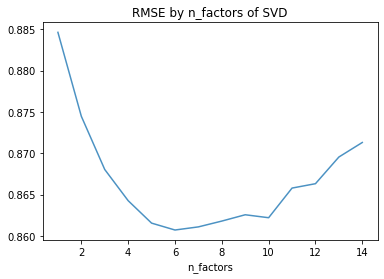

In [12]:
#평가값 그래프 그리기  (모델을 학습후 파라미터만 조정이되나 ?)
rmse_list_by_factors = []
ttime_list_by_factors = []
for n in range(1,15):
    train_start = time.time()
    model = SVD(n_factors = n,
               lr_all = 0.005,
               reg_all = 0.02,
               n_epochs = 100)
    model.fit(train_data)
    train_end = time.time()
    print("training time of model: %.2f seconds" % (train_end - train_start))
    print("RMSE of test dataset in SVD model, n_factors=" + str(n))
    predictions = model.test(test_data)
    rmse_result = accuracy.rmse(predictions)
    rmse_list_by_factors.append(rmse_result)
    ttime_list_by_factors.append((train_end  - train_start))

plt.plot(range(1,15), rmse_list_by_factors, alpha = 0.8)
plt.title("RMSE by n_factors of SVD")
plt.xlabel("n_factors", font_size = 12)
plt.ylabel("RMSE", font_size = 12)
plt.show()


In [13]:
data

In [42]:
#실제 평점과의 비교 시각화하기 : 평점 예측 단계
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id, movie_id, rating))

#타겟 유저의 평점 점수를 예측
target_user_predictions = model.test(test_data)

#에측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id ==uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
                return target_user_movie_predict_dict
# target_user_movie_predict_dict 에서 예측된 점수 중, 타겟 유저의 TOP 10 영화를 선정
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions, 
                                                           user_id = target_user_id,
                                                           user_history = target_user_movie_rating_dict)

target_user_movie_predict_dict



{1: 4.334871574895394,
 2: 3.1111078047295666,
 3: 2.8924683525687582,
 4: 3.4653725068750143,
 5: 3.017222717728127,
 6: 4.203001451274649,
 7: 3.4312062049746106,
 8: 3.483218075382176,
 9: 2.402864693573573,
 10: 3.0625109587079287,
 11: 3.704254871370234,
 12: 2.0096839229319405,
 13: 3.954631645475672,
 14: 4.345520969050041,
 15: 2.337988946552021,
 16: 4.067210894801009,
 17: 4.596582135231344,
 18: 2.829775569421661,
 19: 1.9669881834651186,
 20: 2.7490336307404544,
 21: 3.7941063046161116,
 22: 3.6067093086869755,
 23: 2.608810485405692,
 24: 3.5285257563343033,
 25: 4.428499505787463,
 26: 3.911657283512749,
 27: 2.981855714168781,
 28: 4.457751073190744,
 29: 3.8373596379437793,
 30: 4.0814532712062785,
 31: 3.1707573895012118,
 32: 3.74146910104829,
 33: 3.4801226197813064,
 34: 4.521964012907145,
 35: 4.209612989576202,
 36: 4.5795705474945825,
 37: 3.874897199703459,
 38: 1.947597963268324,
 39: 4.01460734485457,
 40: 3.9734123539437167,
 41: 4.2754756889761705,
 42: 3.30

In [43]:
target_user_predictions

[Prediction(uid=4, iid=260, r_ui=5, est=4.254236922240653, details={'was_impossible': False}),
 Prediction(uid=4, iid=480, r_ui=4, est=3.6236785616714378, details={'was_impossible': False}),
 Prediction(uid=4, iid=1036, r_ui=4, est=3.95554089781168, details={'was_impossible': False}),
 Prediction(uid=4, iid=1097, r_ui=4, est=4.4520866320754315, details={'was_impossible': False}),
 Prediction(uid=4, iid=1196, r_ui=2, est=3.999938016433658, details={'was_impossible': False}),
 Prediction(uid=4, iid=1198, r_ui=5, est=4.350128104175142, details={'was_impossible': False}),
 Prediction(uid=4, iid=1201, r_ui=5, est=4.369148729594818, details={'was_impossible': False}),
 Prediction(uid=4, iid=1210, r_ui=3, est=3.509450181769831, details={'was_impossible': False}),
 Prediction(uid=4, iid=1214, r_ui=4, est=4.584575888621411, details={'was_impossible': False}),
 Prediction(uid=4, iid=1240, r_ui=5, est=4.189075358782344, details={'was_impossible': False}),
 Prediction(uid=4, iid=1387, r_ui=5, est=

In [44]:
test_data #(이용자, 영화, 평점)

[(4, 260, 5),
 (4, 480, 4),
 (4, 1036, 4),
 (4, 1097, 4),
 (4, 1196, 2),
 (4, 1198, 5),
 (4, 1201, 5),
 (4, 1210, 3),
 (4, 1214, 4),
 (4, 1240, 5),
 (4, 1387, 5),
 (4, 1954, 5),
 (4, 2028, 5),
 (4, 2366, 4),
 (4, 2692, 5),
 (4, 2947, 5),
 (4, 2951, 4),
 (4, 3418, 4),
 (4, 3468, 5),
 (4, 3527, 1),
 (4, 3702, 4)]

In [45]:
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [65]:
#실제 평점과 가상예측 평점, 실제평점 , 영화의 제목을 하나로 출력한 결과
#예측 점수와 실제 점수를 영화 타이틀에 매핑
# 예측 점수와 실제 점수를 영화 타이틀에 매핑합니다.
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0
for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    predicted_rating = round(predicted_rating, 2)
    origin_rating = target_user_movie_rating_dict[movie_id]
    movie_title = movie_dict[movie_id]
    print("movie", str(idx), ":", movie_title, "-", origin_rating, "/", predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

KeyError: 1

In [64]:
target_user_movie_predict_dict.items()

dict_items([(1, 4.334871574895394), (2, 3.1111078047295666), (3, 2.8924683525687582), (4, 3.4653725068750143), (5, 3.017222717728127), (6, 4.203001451274649), (7, 3.4312062049746106), (8, 3.483218075382176), (9, 2.402864693573573), (10, 3.0625109587079287), (11, 3.704254871370234), (12, 2.0096839229319405), (13, 3.954631645475672), (14, 4.345520969050041), (15, 2.337988946552021), (16, 4.067210894801009), (17, 4.596582135231344), (18, 2.829775569421661), (19, 1.9669881834651186), (20, 2.7490336307404544), (21, 3.7941063046161116), (22, 3.6067093086869755), (23, 2.608810485405692), (24, 3.5285257563343033), (25, 4.428499505787463), (26, 3.911657283512749), (27, 2.981855714168781), (28, 4.457751073190744), (29, 3.8373596379437793), (30, 4.0814532712062785), (31, 3.1707573895012118), (32, 3.74146910104829), (33, 3.4801226197813064), (34, 4.521964012907145), (35, 4.209612989576202), (36, 4.5795705474945825), (37, 3.874897199703459), (38, 1.947597963268324), (39, 4.01460734485457), (40, 3.9

In [55]:
target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

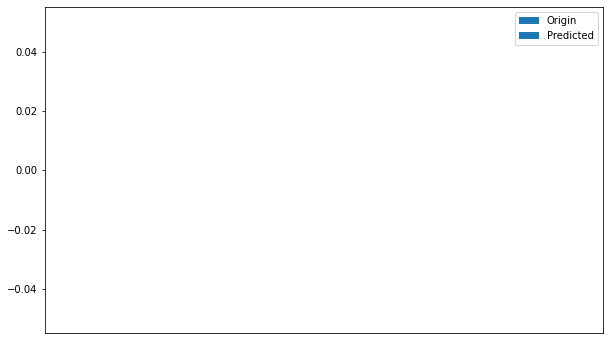

In [62]:
#실제 평점과의 비교 시각화 
origin  = origin_rating_list
predicted = predicted_rating_list

#영화의 개수 만큼 막대 그래프의 index 개수를 생성
plt.rcParams['figure.figsize'] = (10,6)
index = np.arange(len(movie_title_list))
bar_width = 0.2

#실제 점수와 예측 점수를 bar 그래프로 출력
rects1 = plt.bar(index, origin, bar_width,
                color = 'orange',
                label = 'Origin')
rects2 = plt.bar(index + bar_width, predicted, bar_width, 
                color = 'green',
                label= 'Predicted')
plt.xticks(index, movie_title_list)
plt.legend()
plt.show()

In [59]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = './python-data-analysis-master/data/BostonHousing2.csv'
housing = pd.read_csv(path)
housing = housing.rename(columns = {'CMEDV':'y'})
housing.head()

,TOWN,LON,LAT,y,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [67]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   y        506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [68]:
housing.describe()


,LON,LAT,y,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


LON


c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


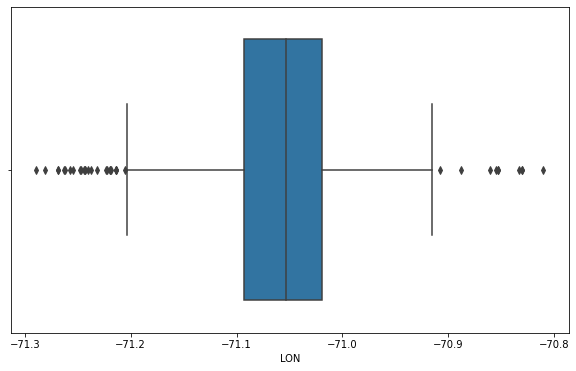

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


LAT


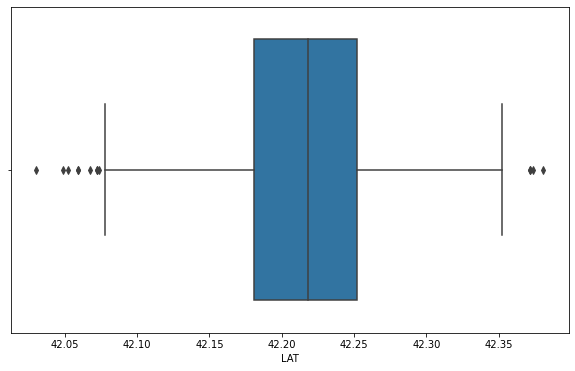

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


y


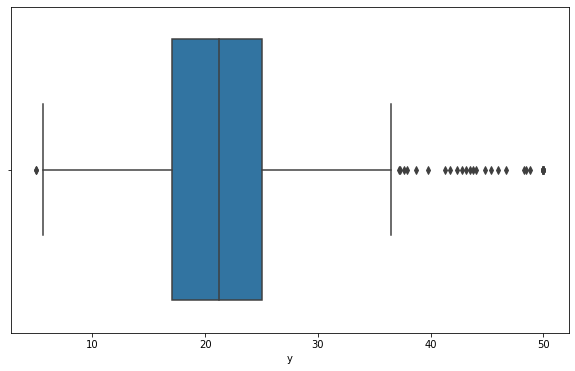

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


CRIM


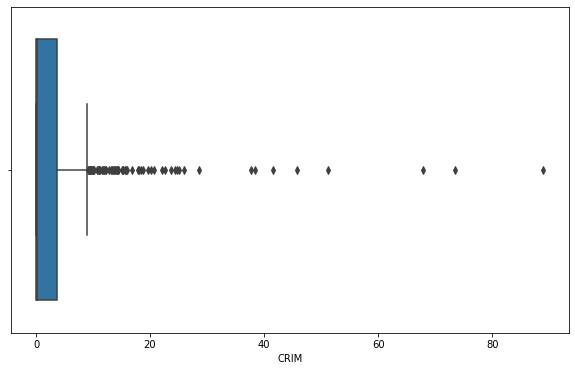

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


ZN


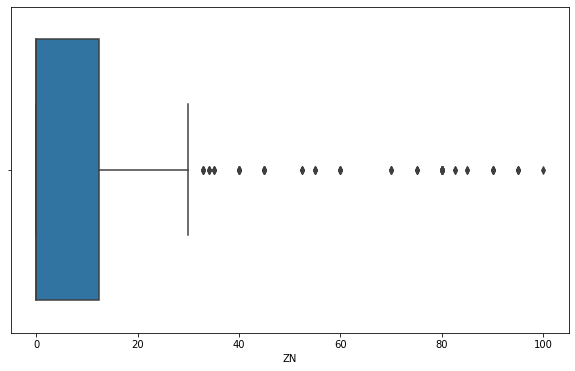

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


INDUS


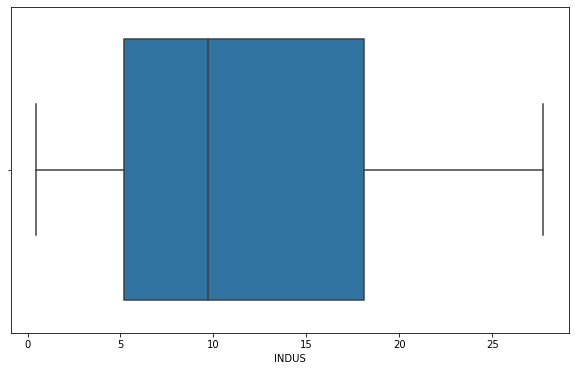

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


CHAS


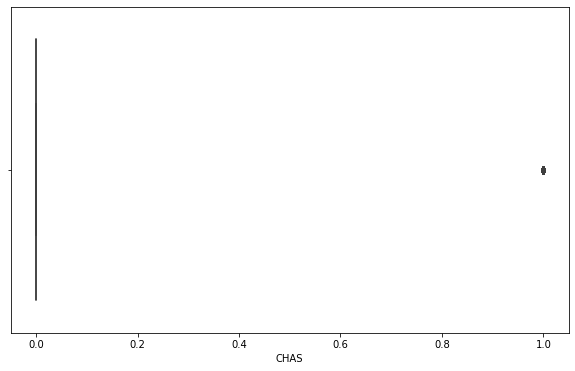

NOX


c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


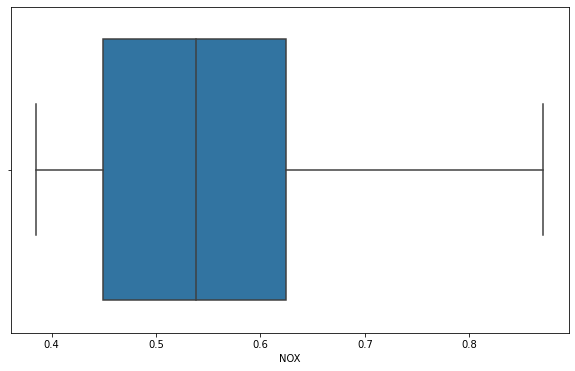

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


RM


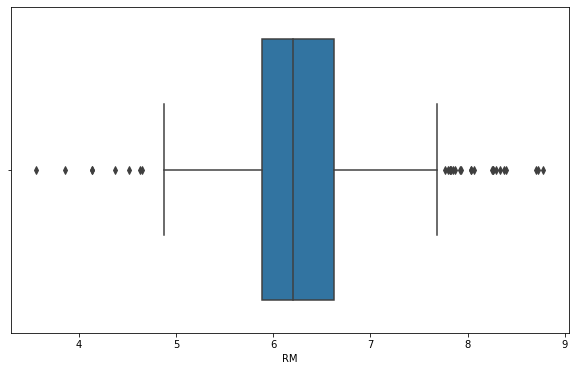

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


AGE


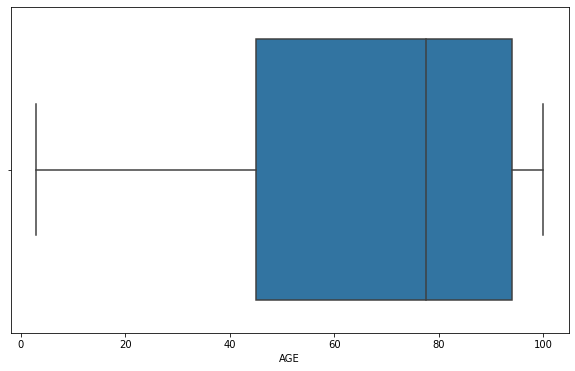

DIS


c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


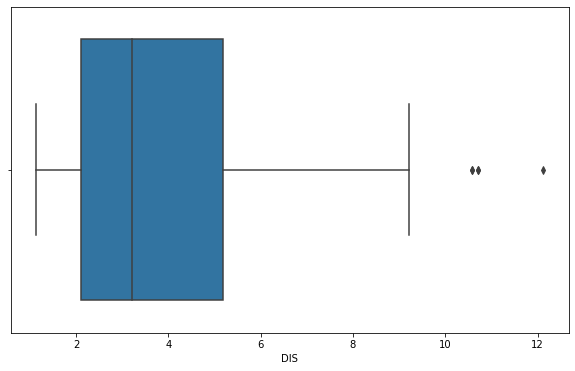

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


RAD


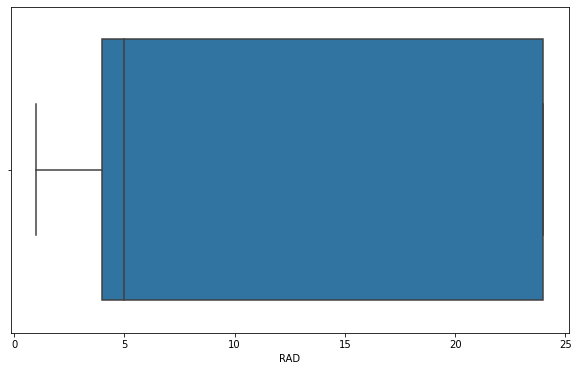

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


TAX


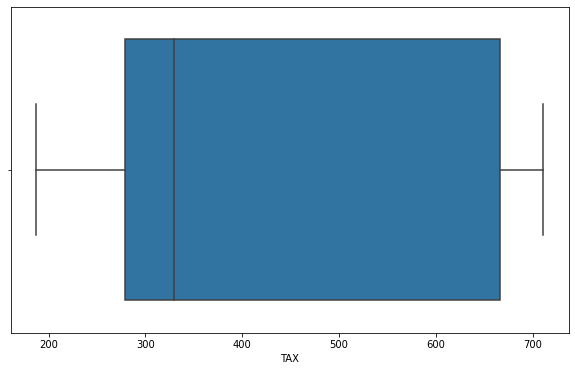

PTRATIO


c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


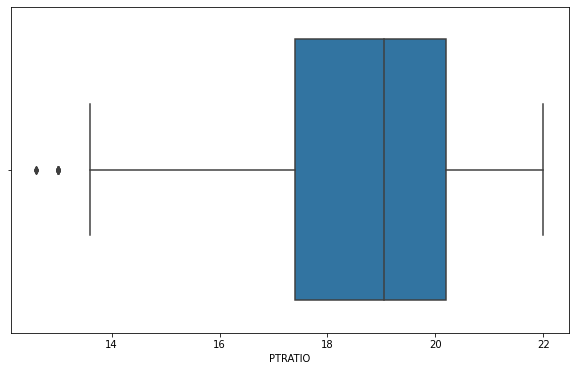

B

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


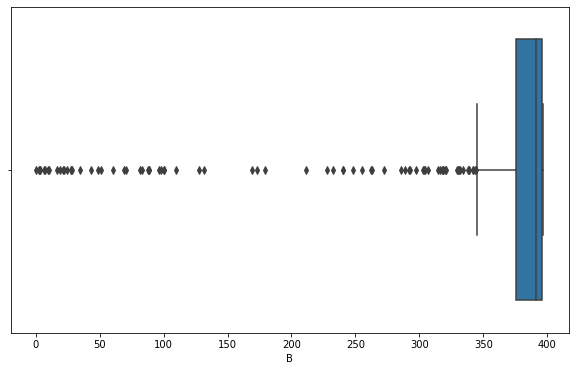

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


LSTAT


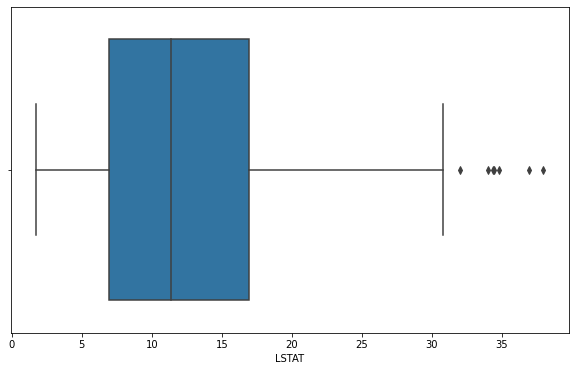

In [76]:
for i in housing.columns[1:]:
    sns.boxplot(x = i, orient = "v", data = housing)
    print(i)
    plt.show()



In [121]:
from sklearn.datasets import load_iris # 샘플 데이터 로딩
from sklearn.model_selection import train_test_split

# load sample
dataset = load_iris()

data = housing[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
target = housing['y']

# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2,  random_state=34)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )
print( "R²=", reg.score(x_train, y_train) )
print( "R²=", reg.score(x_test, y_test) )

coefficient= [-1.06290593e-01  5.54317755e-02  5.32887642e-02  2.42856841e+00
 -1.76660614e+01  3.28190392e+00  8.96962620e-03 -1.45326583e+00
  3.00692937e-01 -1.18410274e-02 -9.48433008e-01  9.02665456e-03
 -5.90140608e-01]
intercept= 39.274531263883524
R²= 0.7416774524370017
R²= 0.714006648690557


In [ ]:
#